# Credit Card Fraud Detection

This project applied a full machine learning pipeline on an imbalanced credit card fraud dataset.

The dataset comes from Kaggle. The link to the dataset is attached here:

https://www.kaggle.com/mlg-ulb/creditcardfraud


## EDA and Data Cleaning

### Import data and basic cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/My Drive/Documents/Projects/Credit_Card_Fraud_Detection/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
# Check and remove duplicate rows
print(df[df.duplicated()].shape)
df = df[~df.duplicated()]
print(df.shape)

(1081, 31)
(283726, 31)


In [ ]:
# Drop time since it does not provide meaningful information
df.drop('Time', axis=1, inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(283726, 30)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We can see that the dataset is highly imbalanced.

In [ ]:
# function for plotting numerical variables
def box_plot(col1, col2):
    df[[col1, col2]].boxplot(by=col2)
    plt.suptitle('')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()

### Numerical features

In [ ]:
numericals = df.columns[:-1]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


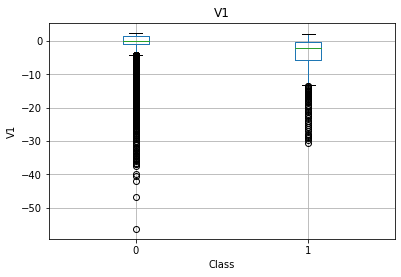

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


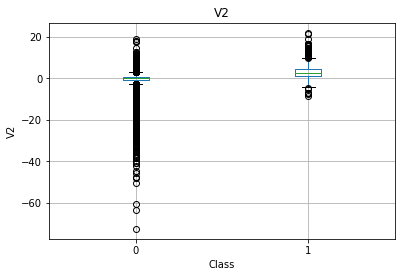

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


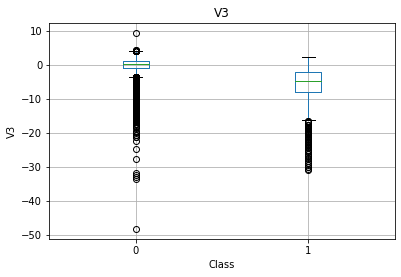

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


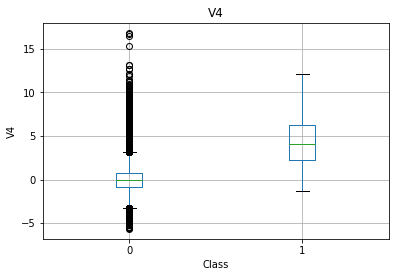

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


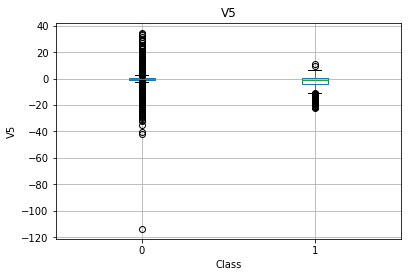

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


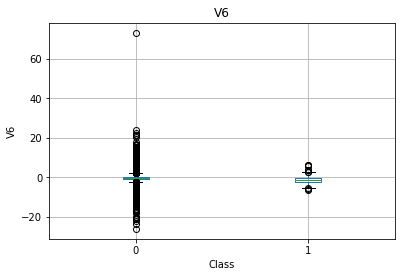

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


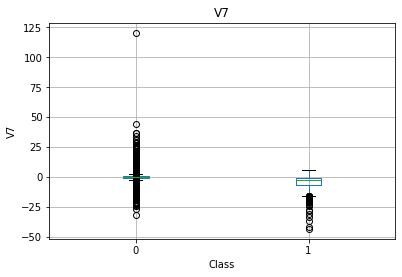

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


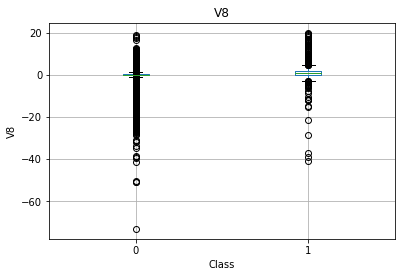

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


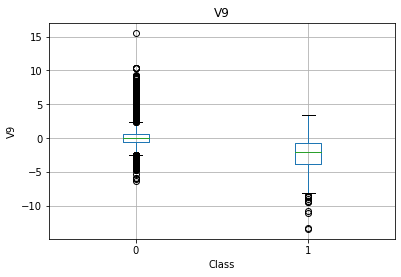

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


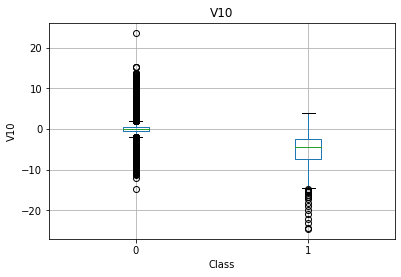

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


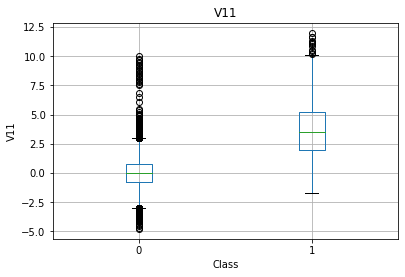

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


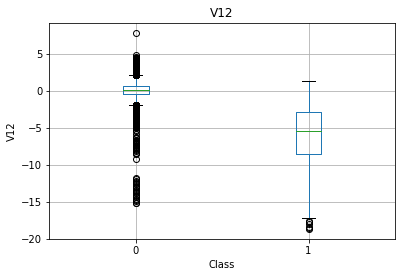

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


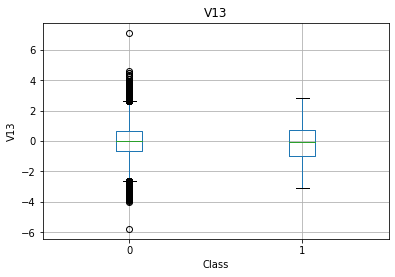

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


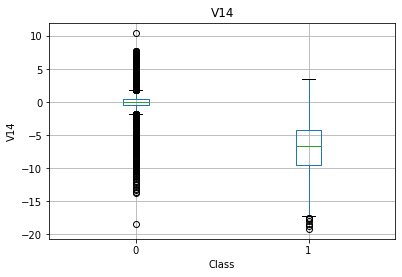

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


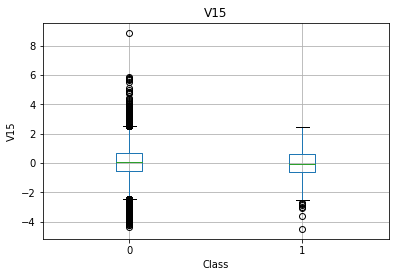

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


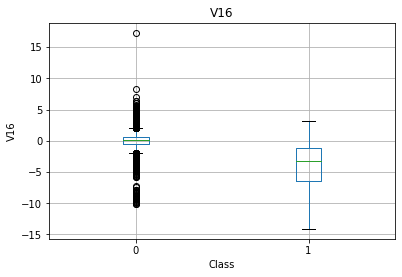

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


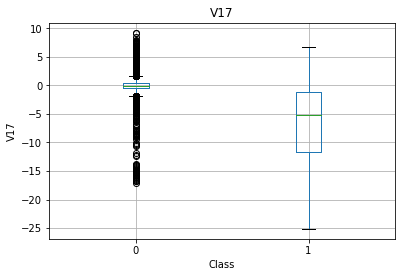

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


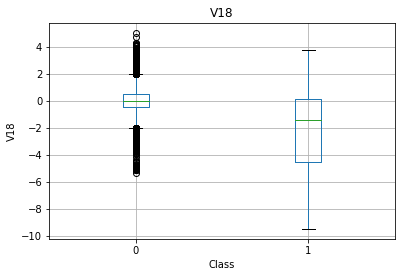

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


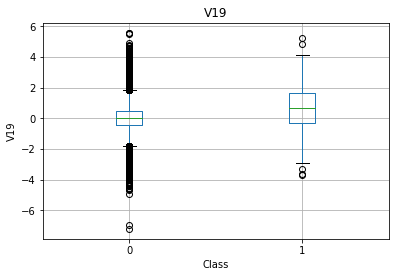

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


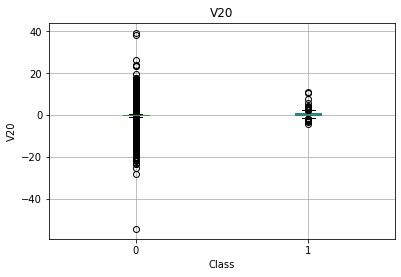

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


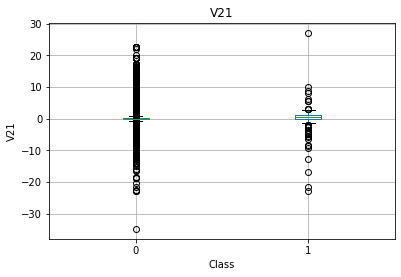

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


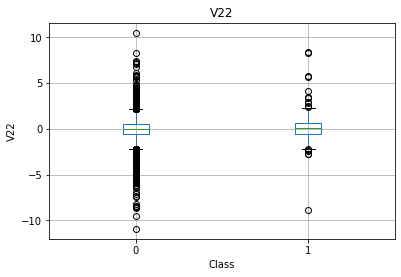

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


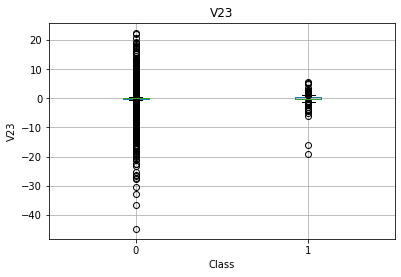

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


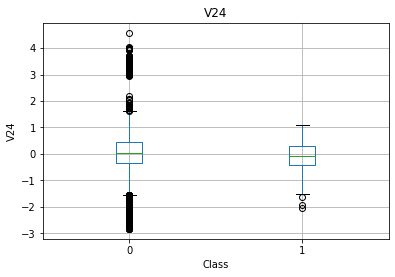

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


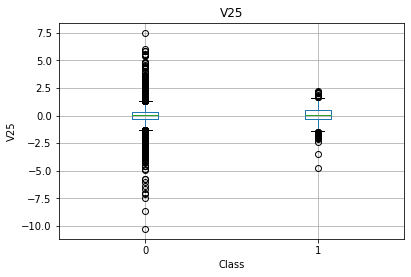

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


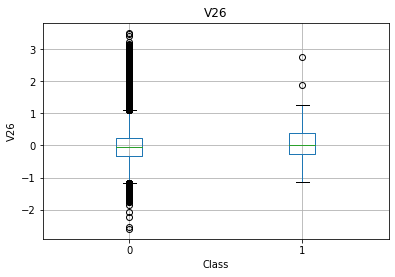

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


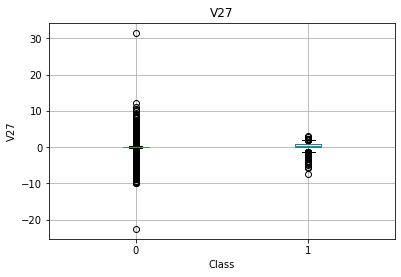

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


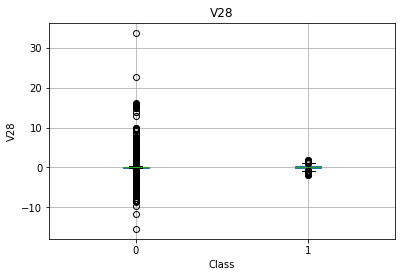

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


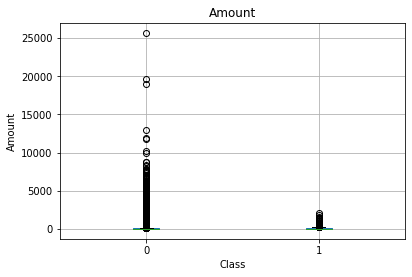

In [ ]:
for i in numericals:
    box_plot(i, 'Class')

### Target variable

In [ ]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

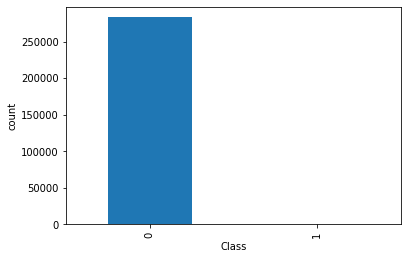

In [ ]:
pd.value_counts(df['Class']).plot.bar()
plt.ylabel('count')
plt.xlabel('Class')
plt.show()

## Feature Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

In [ ]:
y = df['Class']
X = df.loc[:, df.columns != 'Class']
print(y.shape)
print(X.shape)

(283726,)
(283726, 29)


In [ ]:
random_state = 123

# first split to separate out the training set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.1, stratify = y,random_state=random_state)

# second split to separate out the validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.1, stratify = y,random_state=random_state)

In [ ]:
std_ftrs = X.columns

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)

(255353, 29)
(255353, 29)


## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix

In [ ]:
# function for training models

def MLpipe_stratKFold_roc_auc(X, y, preprocessor, ML_algo, param_grid, n_random_states):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The roc_auc is maximized in cross-validation.
    '''
    # We are using code from class
    nr_states = n_random_states
    test_scores = np.zeros(nr_states)
    final_models = []

    for i in range(nr_states):
        # first split to separate out the test set
        # we will use kfold on other
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.1, stratify = y,random_state=123*i)

        # splitter for other
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=123*i)

        # the classifier
        clf = ML_algo # initialize the classifier

        # let's put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = make_pipeline(preprocessor,clf)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'average_precision',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)
        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_)
        # save the model
        final_models.append(grid)
        # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = average_precision_score(y_test,y_test_pred)
    return final_models, test_scores


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    'logisticregression__penalty': ['l2', 'none'],
    'logisticregression__C': np.logspace(-1,1,3)
} 
ML_algo = LogisticRegression(max_iter = 10000, random_state=random_state, class_weight={0:1, 1:25})

In [ ]:
logreg, logreg_scores = MLpipe_stratKFold_roc_auc(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'none'}
validation score: 0.7400179438194794
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}
validation score: 0.7374872499264248
Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'none'}
validation score: 0.7446517666343223
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}
validation score: 0.7412430229839627
Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'none'}
validation score: 0.7365443632954717
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7503190224563292
Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'none'}
validation score: 0.7374094398799089
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}
validation score: 0.7559198898641858
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7534403823292471
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}
validation score: 0.7527395161976953


In [ ]:
logreg_scores

array([0.55832136, 0.53003107, 0.58000408, 0.53634644, 0.5222449 ,
       0.48415029, 0.57708175, 0.46269625, 0.47618934, 0.48581344])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'randomforestclassifier__max_depth': [1, 3],
    'randomforestclassifier__max_features': [0.5, 1.0]
} 
ML_algo = RandomForestClassifier(random_state=random_state, class_weight={0:1, 1:25})

In [ ]:
rf, rf_scores = MLpipe_stratKFold_roc_auc(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.727637514028707
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.728188125336364
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.736118082231221
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation score: 0.7317080240512651
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 1.0}
validation

In [ ]:
rf_scores

array([0.56926913, 0.60641414, 0.59479448, 0.59631076, 0.56926913,
       0.53066592, 0.63482514, 0.49278891, 0.51395977, 0.55892455])

### XGBoost

In [ ]:
import xgboost
param_grid = {
    'xgbclassifier__max_depth': [1, 5, 10],
    'xgbclassifier__learning_rate': [0.05, 0.1]
}
ML_algo = xgboost.XGBClassifier(use_label_encoder=False, random_state=random_state, scale_pos_weight=25)

In [ ]:
xgb, xgb_scores = MLpipe_stratKFold_roc_auc(X, y, preprocessor, ML_algo, param_grid, 5)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10}
validation score: 0.8425722711532595
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10}
validation score: 0.8478681722989703
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10}
validation score: 0.8466340890917846
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10}
validation score: 0.8435136665700119
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 10}
validation score: 0.8403551311095552


In [ ]:
xgb_scores.mean()

0.7592060433720302